# Heart Disease
#### Using Bayesian Network

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pgmpy
import seaborn as sns
plt.style.use('dark_background')

In [2]:
from pgmpy.models import BayesianModel
attributes="Age,Sex,CP,Rest BP,Cholestrol,FBS,Rest ECG,Thalach,Exang,Oldpeak,Slope,Ca,Thal,Result"
attributes=attributes.split(",")
df=pd.read_csv('/Users/rudra_sarkar/Documents/jupyter practice projects/processed.cleveland.data',names=attributes)
df.head()

,Age,Sex,CP,Rest BP,Cholestrol,FBS,Rest ECG,Thalach,Exang,Oldpeak,Slope,Ca,Thal,Result
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


## Pairplotting Data Frame

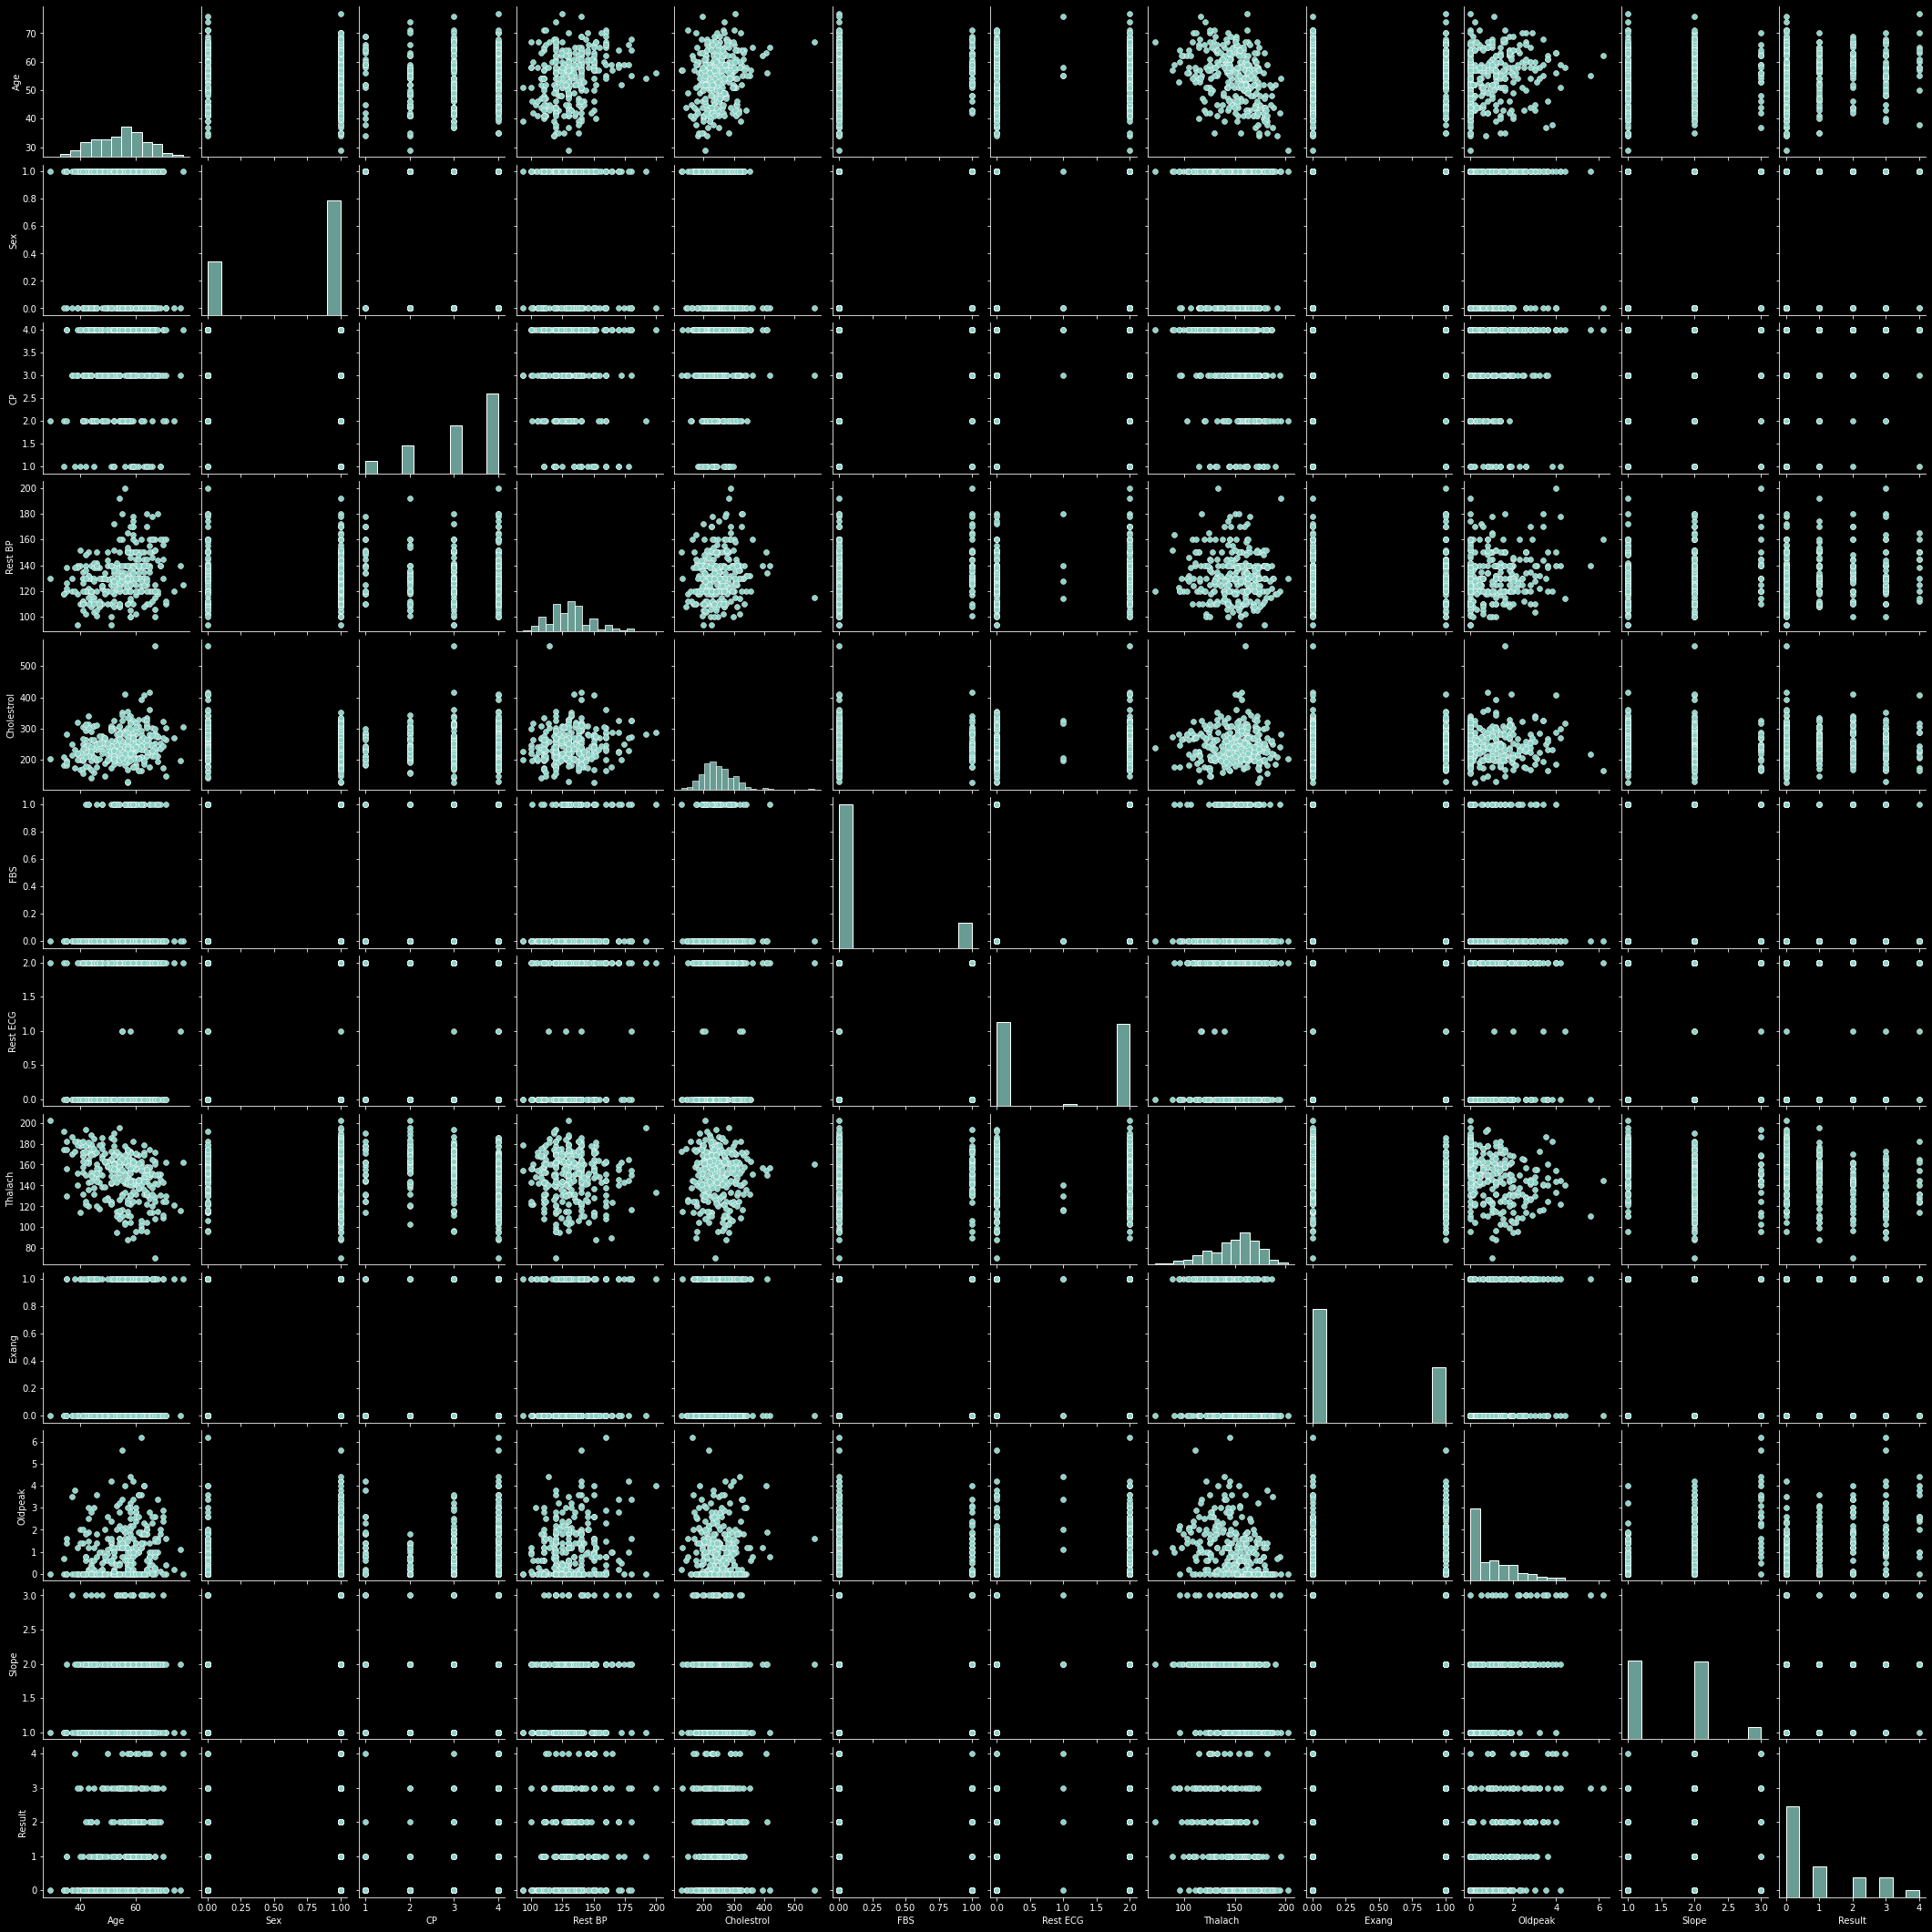

In [3]:
sns.pairplot(df)

## Heatmap Plotting
#### Finding Correlated Features

<AxesSubplot:>

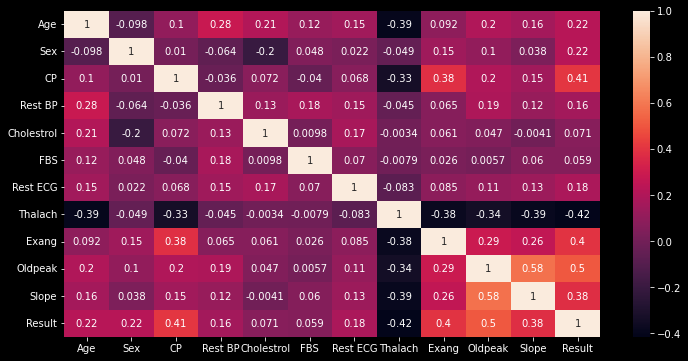

In [4]:
plt.figure(figsize=[12,6])
sns.heatmap(df.corr(),annot=True)

In [5]:
df.keys()

Index(['Age', 'Sex', 'CP', 'Rest BP', 'Cholestrol', 'FBS', 'Rest ECG',
       'Thalach', 'Exang', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'Result'],
      dtype='object')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Oldpeak', ylabel='Result'>

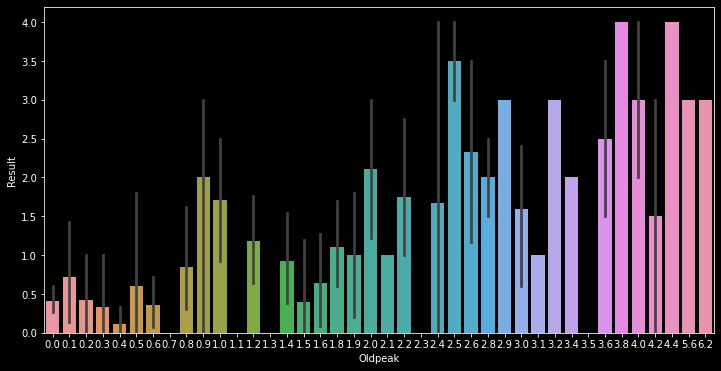

In [6]:
plt.figure(figsize=[12,6])
sns.barplot(df["Oldpeak"],df["Result"])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Result', ylabel='Oldpeak'>

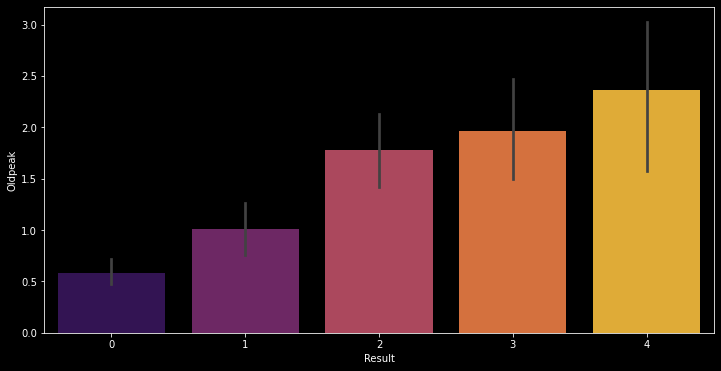

In [7]:
plt.figure(figsize=[12,6])
sns.barplot(df["Result"],df["Oldpeak"],palette="inferno")


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Result', ylabel='Sex'>

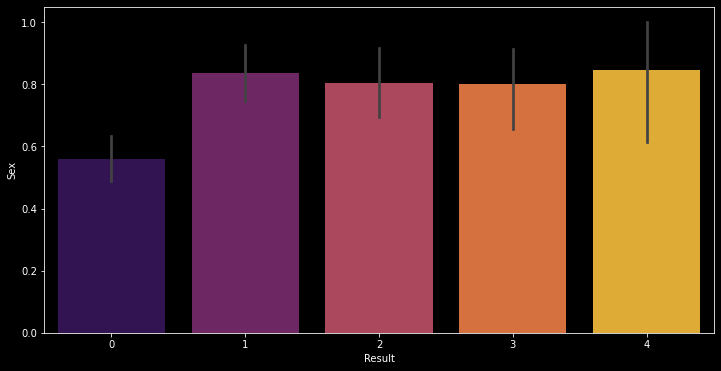

In [8]:
plt.figure(figsize=[12,6])
sns.barplot(df["Result"],df["Sex"],palette="inferno")

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Result'>

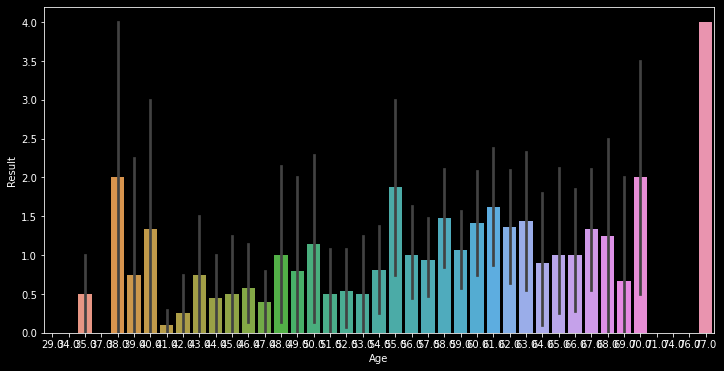

In [9]:
plt.figure(figsize=[12,6])
sns.barplot(df["Age"],df["Result"])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Result', ylabel='Age'>

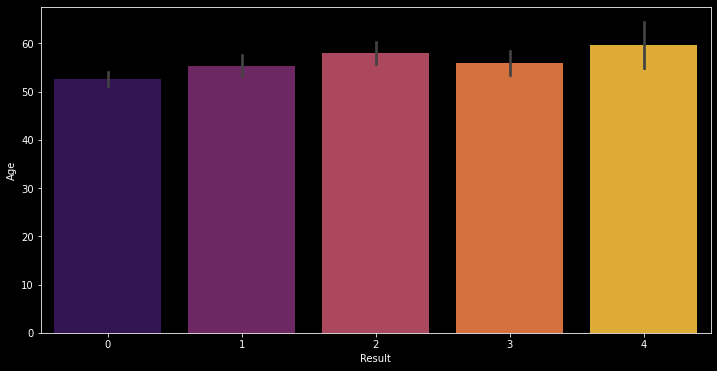

In [10]:
plt.figure(figsize=[12,6])
sns.barplot(df["Result"],df["Age"],palette="inferno")

## Creating the Bayesian Network

In [11]:
model=BayesianModel([('Age','CP'),('Sex','CP'),('Age','Thalach'),('Age','Cholestrol'),('CP','Exang'),('Exang','Oldpeak'),('Rest BP','Slope'),('Slope','Oldpeak'),
('Oldpeak','Result'),('Cholestrol','Result'),('Thalach','Result')])
model.fit(df)

/opt/anaconda3/lib/python3.9/site-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


In [12]:
print(model.get_cpds("CP"))

+---------+-----------+-----------+-----+-----------+-----------+
| Age     | Age(29.0) | Age(29.0) | ... | Age(77.0) | Age(77.0) |
+---------+-----------+-----------+-----+-----------+-----------+
| Sex     | Sex(0.0)  | Sex(1.0)  | ... | Sex(0.0)  | Sex(1.0)  |
+---------+-----------+-----------+-----+-----------+-----------+
| CP(1.0) | 0.25      | 0.0       | ... | 0.25      | 0.0       |
+---------+-----------+-----------+-----+-----------+-----------+
| CP(2.0) | 0.25      | 1.0       | ... | 0.25      | 0.0       |
+---------+-----------+-----------+-----+-----------+-----------+
| CP(3.0) | 0.25      | 0.0       | ... | 0.25      | 0.0       |
+---------+-----------+-----------+-----+-----------+-----------+
| CP(4.0) | 0.25      | 0.0       | ... | 0.25      | 1.0       |
+---------+-----------+-----------+-----+-----------+-----------+


In [13]:
print(model.get_cpds('Oldpeak'))

+--------------+-----+------------+--------------------+
| Exang        | ... | Exang(1.0) | Exang(1.0)         |
+--------------+-----+------------+--------------------+
| Slope        | ... | Slope(2.0) | Slope(3.0)         |
+--------------+-----+------------+--------------------+
| Oldpeak(0.0) | ... | 0.09375    | 0.0                |
+--------------+-----+------------+--------------------+
| Oldpeak(0.1) | ... | 0.015625   | 0.0                |
+--------------+-----+------------+--------------------+
| Oldpeak(0.2) | ... | 0.046875   | 0.0                |
+--------------+-----+------------+--------------------+
| Oldpeak(0.3) | ... | 0.0        | 0.0                |
+--------------+-----+------------+--------------------+
| Oldpeak(0.4) | ... | 0.0        | 0.0                |
+--------------+-----+------------+--------------------+
| Oldpeak(0.5) | ... | 0.0        | 0.0                |
+--------------+-----+------------+--------------------+
| Oldpeak(0.6) | ... | 0.046875

In [14]:
print(model.get_cpds("Result"))

+------------+-------------------+-----+-------------------+
| Cholestrol | Cholestrol(126.0) | ... | Cholestrol(564.0) |
+------------+-------------------+-----+-------------------+
| Oldpeak    | Oldpeak(0.0)      | ... | Oldpeak(6.2)      |
+------------+-------------------+-----+-------------------+
| Thalach    | Thalach(71.0)     | ... | Thalach(202.0)    |
+------------+-------------------+-----+-------------------+
| Result(0)  | 0.2               | ... | 0.2               |
+------------+-------------------+-----+-------------------+
| Result(1)  | 0.2               | ... | 0.2               |
+------------+-------------------+-----+-------------------+
| Result(2)  | 0.2               | ... | 0.2               |
+------------+-------------------+-----+-------------------+
| Result(3)  | 0.2               | ... | 0.2               |
+------------+-------------------+-----+-------------------+
| Result(4)  | 0.2               | ... | 0.2               |
+------------+----------

In [15]:

model.check_model()

True

## Inference

In [25]:
from pgmpy.inference import VariableElimination
infer=VariableElimination(model)
q=infer.query(variables=['Result'],evidence={"Age":29,"Sex":0})
print(q)

+-----------+---------------+
| Result    |   phi(Result) |
+===========+===============+
| Result(0) |        0.4611 |
+-----------+---------------+
| Result(1) |        0.1347 |
+-----------+---------------+
| Result(2) |        0.1347 |
+-----------+---------------+
| Result(3) |        0.1347 |
+-----------+---------------+
| Result(4) |        0.1347 |
+-----------+---------------+
